In [1]:
import pandas as pd
df = pd.read_csv('car.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [2]:
df.shape


(301, 9)

In [5]:
print(df['Selling_type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

#Here, we will be creating our final dataset where we will exclude the feature 'Car_Name'
as our target variable is selling price of the car so in this case, 'Selling_Price' and
'Present_Price' are our most important feature including other numeic features


In [8]:
final_dataset = df [['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset ['Current_Year'] = 2023

In [11]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [12]:
#Creating our new column no_of_year
final_dataset['no_of_year'] = final_dataset['Current_Year'] - final_dataset['Year']

In [13]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [14]:
#Dropping Unnecessary columns
final_dataset.drop(['Year'], axis = 1, inplace = True)

In [15]:
final_dataset.drop(['Current_Year'], axis = 1, inplace = True)


In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
#One Hot Encoding for Categorical variables by creating dummy variables
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [19]:
#Co-realtion between features of dataset
final_dataset.corr()

,Selling_Price,Present_Price,Driven_kms,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878914,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878914,1.000000,0.203618,0.008058,0.047192,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,0.029187,0.203618,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008058,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047192,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473390,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465326,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.550724,-0.512121,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348776,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


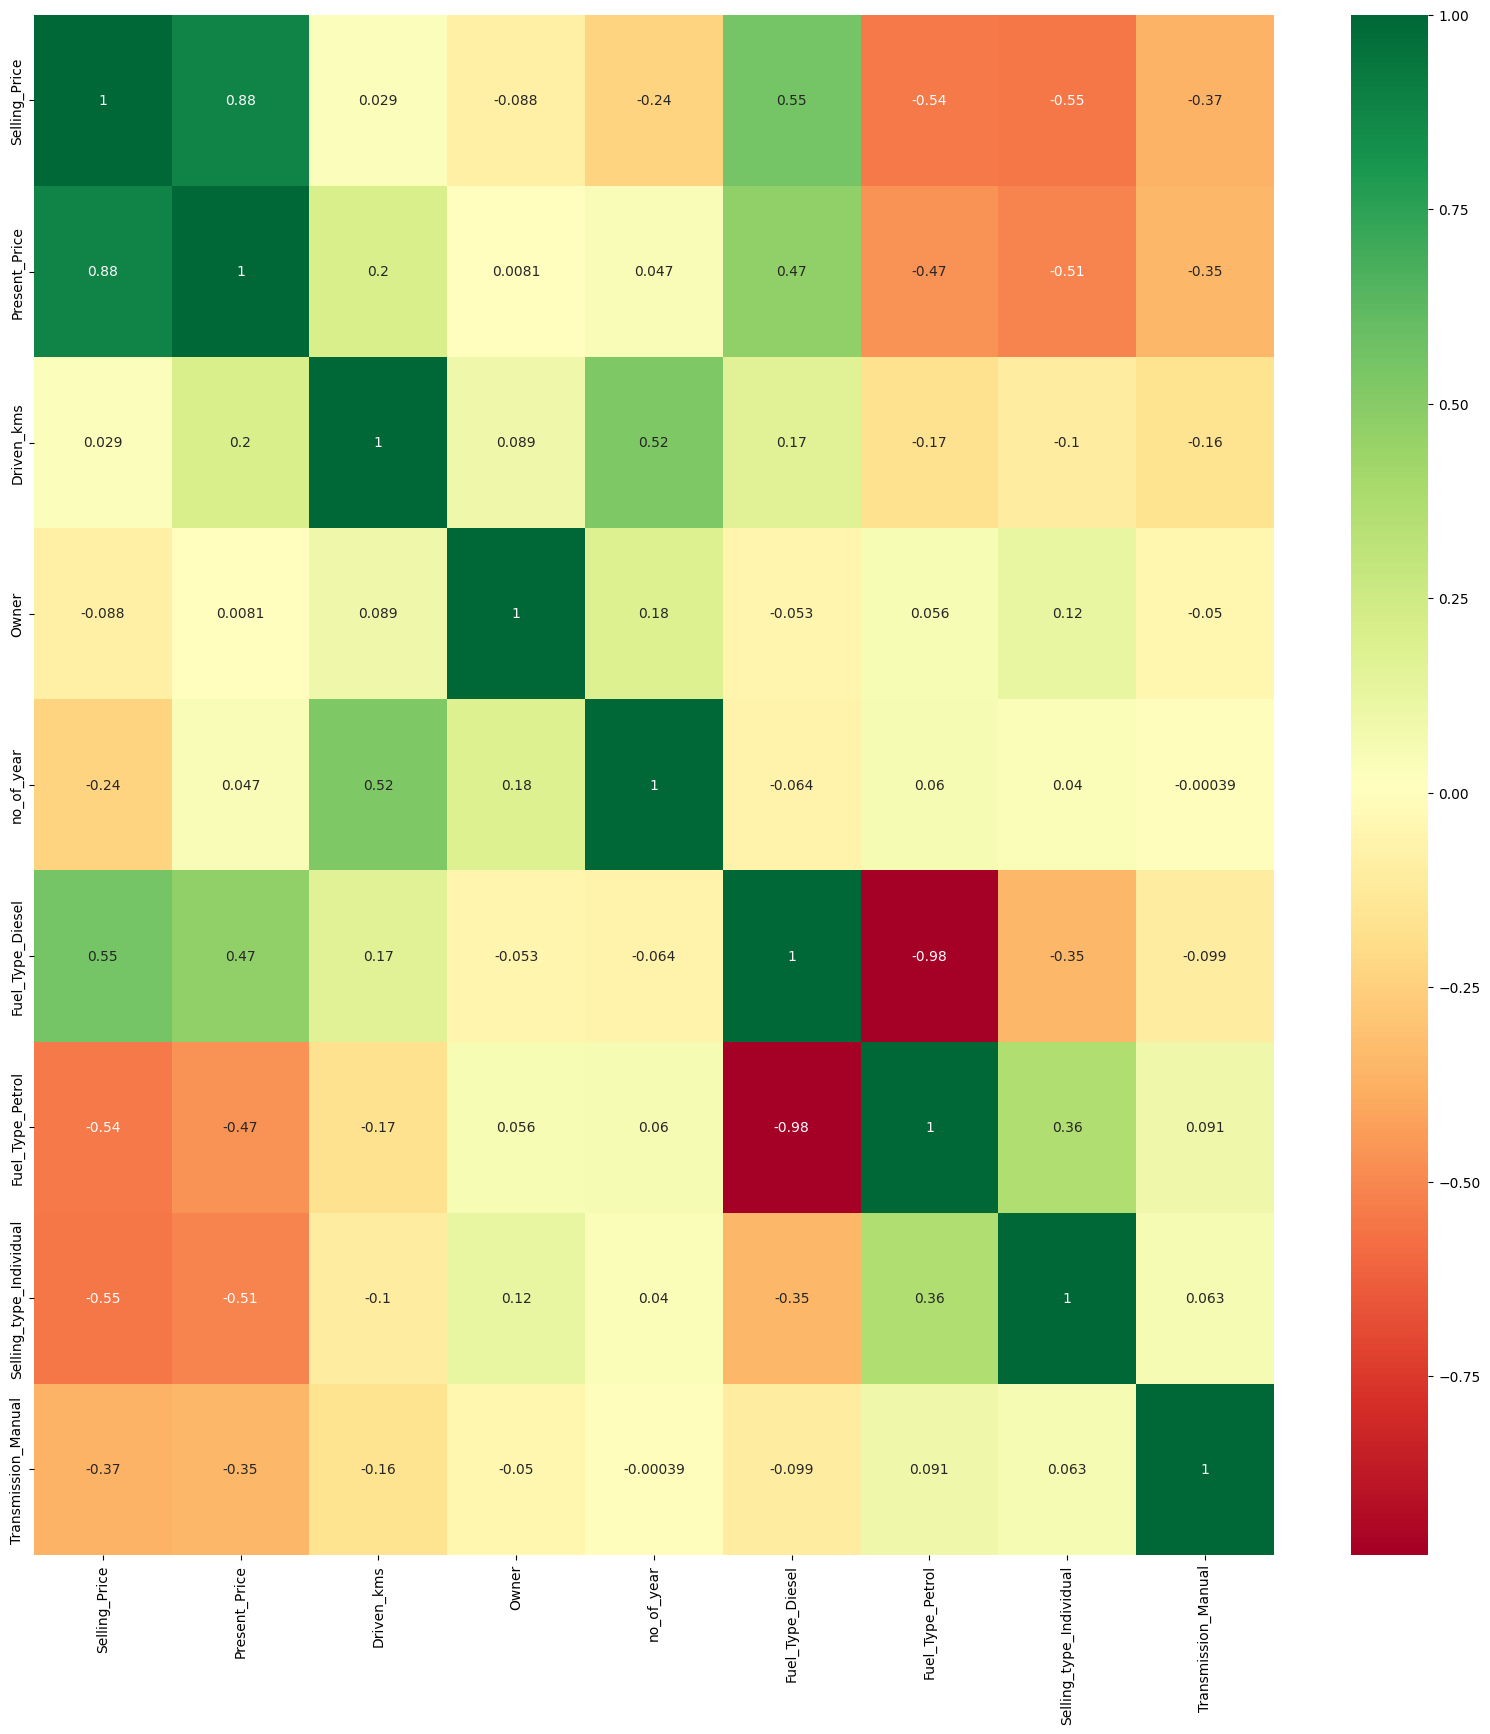

In [20]:
#Visualising this corelation using heatmaps via seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
corelation = final_dataset.corr()
top_corelation_features = corelation.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(final_dataset[top_corelation_features].corr(), annot = True, cmap = "RdYlGn" )

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


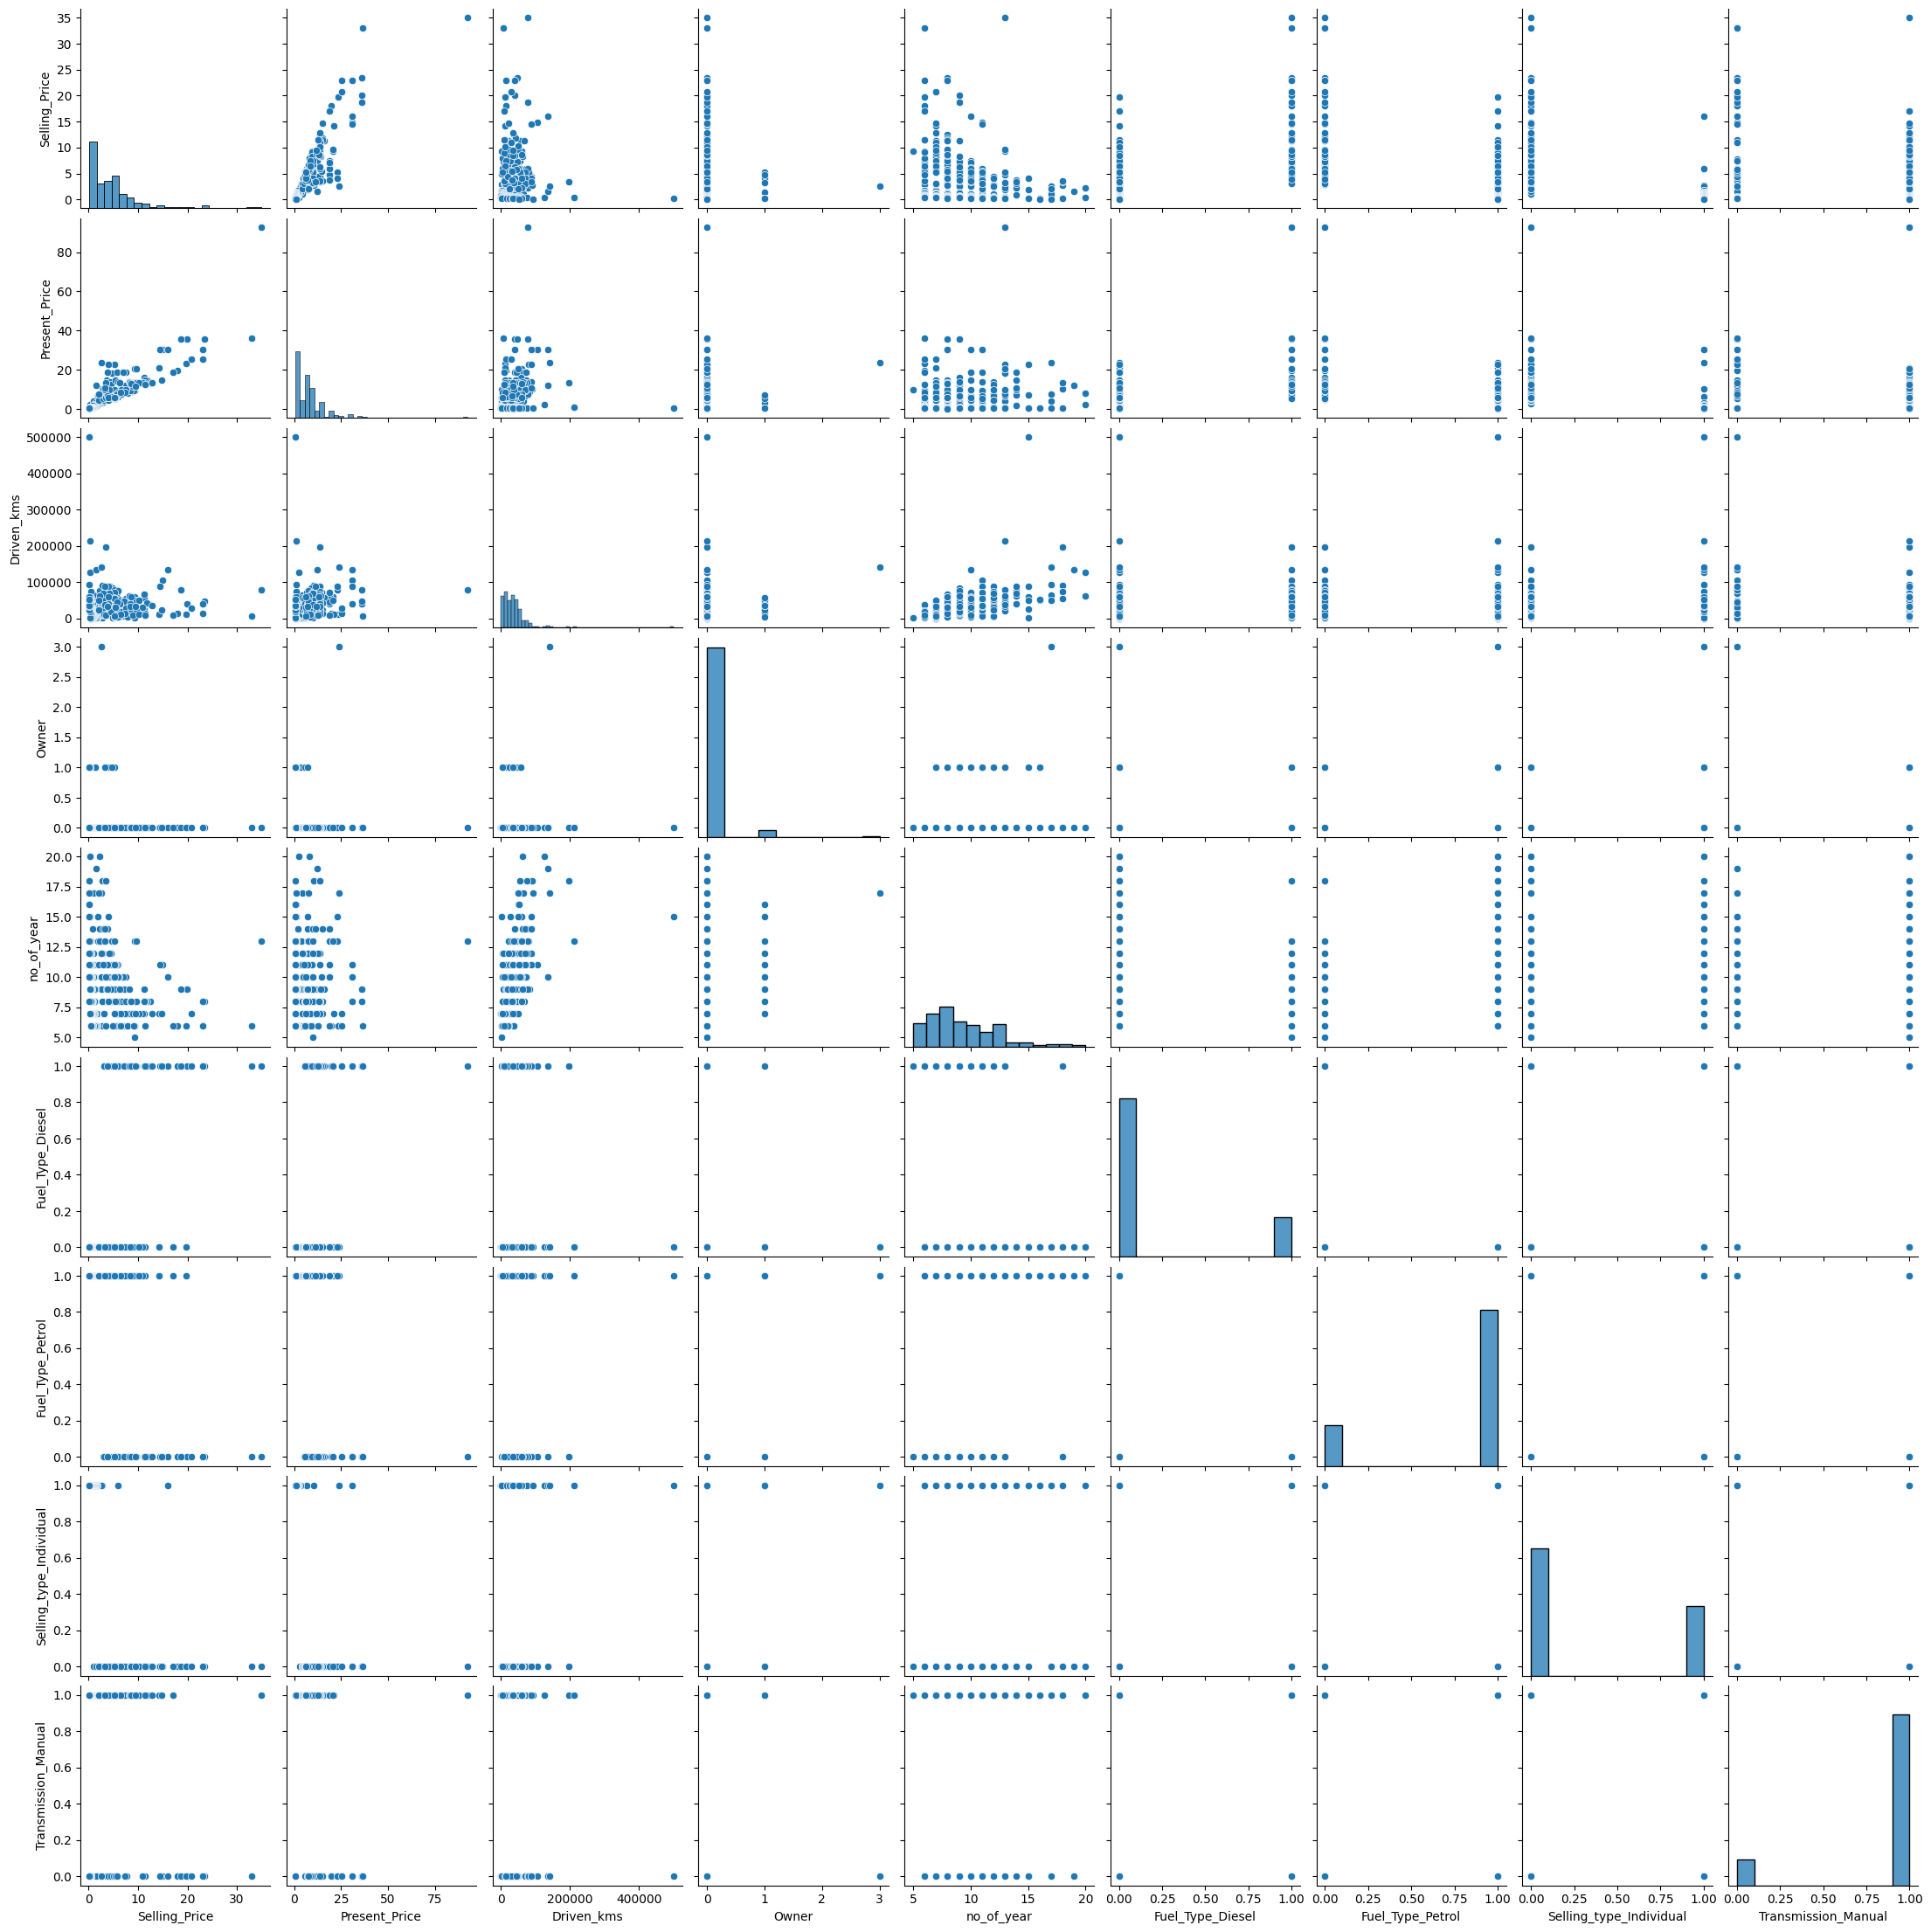

In [21]:
sns.pairplot(final_dataset)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [23]:
#Splitting dataset into X and Y variables
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]


In [24]:
X.shape


(301, 8)

In [25]:
y.shape


(301,)

In [26]:
X.head()

,Present_Price,Driven_kms,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,9,False,True,False,True
1,9.54,43000,0,10,True,False,False,True
2,9.85,6900,0,6,False,True,False,True
3,4.15,5200,0,12,False,True,False,True
4,6.87,42450,0,9,True,False,False,True


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
#Lets do the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=3)

In [29]:
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ",y_test.shape)


x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


Creating models (Evaluation)

In [30]:
from sklearn import linear_model

In [31]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)


In [32]:
X.columns

Index(['Present_Price', 'Driven_kms', 'Owner', 'no_of_year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [33]:
y_pred = lm.predict(X_test)

In [35]:
lm.coef_

array([ 4.26695397e-01, -5.87555210e-06, -7.49805334e-01, -3.87338986e-01,
        2.61716294e+00,  6.45599618e-01, -1.12687328e+00, -1.50980492e+00])

In [36]:
lm.intercept_


5.99711778455941

In [37]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

3.402659836715179
